# Prédiction du prix des maisons par classification
## Objectif de cette partie
Notre objectif ici est de prédire le prix des maisons en utilisant de la classification multivariée basée sur des intervalles de prix. Meme si la regression est a priori la méthode à privilégier pour prédire le prix des maisons, le fait de le faire via la classification peut aussi être interessant, dans la mesure où cela nous permet de grouper selon des intervalles de prix. A la fin, on aura donc une estimation de l'intervalle de prix auquel appartient chaque maison, avec une mesure de précision de la prédiction. Par ailleurs, cela nous permet aussi d'explorer plusieurs types de problèmes, ce qui a un intérêt pédagogique certain pour nous.

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Exploration des données
Dans cette première phase, on va juste observer à quoi ressemblent nos données, le nombre de features...

In [2]:
df = pd.read_csv('data/dataset.csv', delimiter=';')
pd.set_option('display.max_columns', None)

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [4]:
df.describe

<bound method NDFrame.describe of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
2914  2915         160       RM         21.0     1936   Pave   NaN      Reg   
2915  2916         160       RM         21.0     1894   Pave   NaN      Reg   
2916  2917          20       RL        160.0    20000   Pave   NaN      Reg   
2917  2918          85       RL         62.0    10441   Pave   NaN      Reg   
2918  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour 

In [5]:
df.shape

(2919, 81)

## Choix des variables les plus corrélées

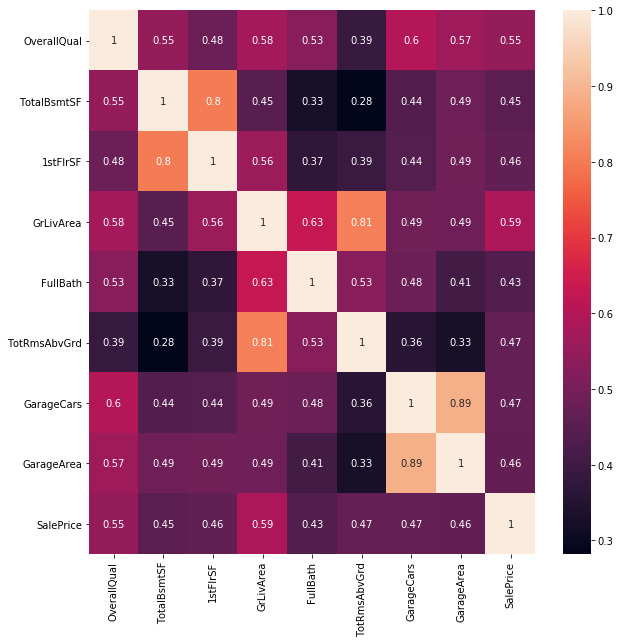

In [6]:
matCorr = df.corr() #Matrice de corrélation
mostCorrFeatures = matCorr.index[abs(matCorr["SalePrice"])>0.4] #on selectionne seulement les features dont la corrélation au prix de vente est superieure a 0.5
plt.figure(figsize=(10,10))
graph = sns.heatmap(df[mostCorrFeatures].corr(),annot=True)

In [7]:
df = df[['OverallQual', '1stFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']]
df

,OverallQual,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,7,856,1710,8,2.0,548.0,208500.000000
1,6,1262,1262,6,2.0,460.0,181500.000000
2,7,920,1786,6,2.0,608.0,223500.000000
3,7,961,1717,7,3.0,642.0,140000.000000
4,8,1145,2198,9,3.0,836.0,250000.000000
...,...,...,...,...,...,...,...
2914,4,546,1092,5,0.0,0.0,167081.220949
2915,4,546,1092,6,1.0,286.0,164788.778231
2916,5,1224,1224,7,2.0,576.0,219222.423400
2917,5,970,970,6,0.0,0.0,184924.279659


## Nettoyage des données et normalisation

In [8]:
def donneesManquantes(dataframe):
    total = dataframe.isnull().sum().sort_values(ascending=False)
    pourcent = (dataframe.isnull().sum()/dataframe.isnull().count()).sort_values(ascending=False)
    donnees_manquantes = pd.concat([total, pourcent], axis=1, keys=['Nombre de données manquantes', 'Pourcentage de donnees manquantes'])
    return donnees_manquantes.head(30)
donneesManquantes(df)

,Nombre de données manquantes,Pourcentage de donnees manquantes
GarageArea,1,0.000343
GarageCars,1,0.000343
SalePrice,0,0.000000
TotRmsAbvGrd,0,0.000000
GrLivArea,0,0.000000
1stFlrSF,0,0.000000
OverallQual,0,0.000000


In [9]:
def remplacerParMediane(feature):
    mediane = feature.median()
    for i in range(len(feature)):
        if math.isnan(feature[i])==True:
            feature[i]=mediane
    return
remplacerParMediane(df['GarageArea'])
remplacerParMediane(df['GarageCars'])

/opt/anaconda3/envs/net4529/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/envs/net4529/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/anaconda3/envs/net4529/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
df.isnull().sum().max() #Pour connaitre le nombre de données manquantes

0

In [11]:
print(df.dtypes)

OverallQual       int64
1stFlrSF          int64
GrLivArea         int64
TotRmsAbvGrd      int64
GarageCars      float64
GarageArea      float64
SalePrice       float64
dtype: object


## Création des intervalles de prix
Pour l'instant, on n'a que les prix pour chaque maison. Pour pouvoir traiter ce problème comme un problème de classification, on va devoir créer des intervalles de prix. Pour ce faire, on va d'abord observer la répartition des prix pour créer les catégories.

/opt/anaconda3/envs/net4529/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


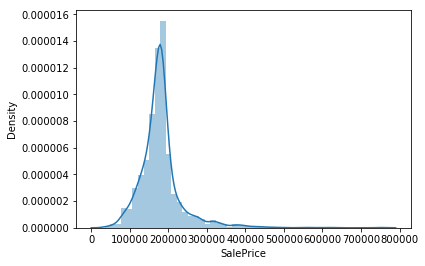

In [12]:
#Observer la distribution des prix
sns.distplot(df['SalePrice'])

On voit ici la répartition. Pour faire notre classification, on va donc séparer nos données par prix, selon les intervalles suivants : ]0,100000] ; ]100000,150000] ; ]150000,200000] ; ]200000,300000] ; ]300000,1000000]. On va créer une feature "SalePriceInterval" pour cela.

In [13]:
df['SalePriceInterval'] = pd.cut(x=df['SalePrice'], bins=[0, 100000, 150000, 200000, 300000, 1000000])

/opt/anaconda3/envs/net4529/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df.shape

(2919, 8)

In [15]:
df

,OverallQual,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,SalePriceInterval
0,7,856,1710,8,2.0,548.0,208500.000000,"(200000, 300000]"
1,6,1262,1262,6,2.0,460.0,181500.000000,"(150000, 200000]"
2,7,920,1786,6,2.0,608.0,223500.000000,"(200000, 300000]"
3,7,961,1717,7,3.0,642.0,140000.000000,"(100000, 150000]"
4,8,1145,2198,9,3.0,836.0,250000.000000,"(200000, 300000]"
...,...,...,...,...,...,...,...,...
2914,4,546,1092,5,0.0,0.0,167081.220949,"(150000, 200000]"
2915,4,546,1092,6,1.0,286.0,164788.778231,"(150000, 200000]"
2916,5,1224,1224,7,2.0,576.0,219222.423400,"(200000, 300000]"
2917,5,970,970,6,0.0,0.0,184924.279659,"(150000, 200000]"


A ce stade, les intervalles ne sont pas utilisables directement. Le modèle ayant besoin de travailler sur des données numériques, on va transformer ces intervalles en données numériques. Pour cela, on va utiliser la méthode get_dummies. Par exemple, pour une maison qui appartient à l'intervalle ]200000,300000], on mettra à 0 les features qui correspondent à une appartenance aux intervalles ]0,100000] ; ]100000,150000] ; ]150000,200000] et ]300000,1000000], et on mettra à 1 la feature correspondant à l'intervalle ]200000,300000].

In [16]:
df = pd.get_dummies(df, columns=['SalePriceInterval'])
df = df.drop("SalePrice", axis=1)
df

,OverallQual,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageCars,GarageArea,"SalePriceInterval_(0, 100000]","SalePriceInterval_(100000, 150000]","SalePriceInterval_(150000, 200000]","SalePriceInterval_(200000, 300000]","SalePriceInterval_(300000, 1000000]"
0,7,856,1710,8,2.0,548.0,0,0,0,1,0
1,6,1262,1262,6,2.0,460.0,0,0,1,0,0
2,7,920,1786,6,2.0,608.0,0,0,0,1,0
3,7,961,1717,7,3.0,642.0,0,1,0,0,0
4,8,1145,2198,9,3.0,836.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2914,4,546,1092,5,0.0,0.0,0,0,1,0,0
2915,4,546,1092,6,1.0,286.0,0,0,1,0,0
2916,5,1224,1224,7,2.0,576.0,0,0,0,1,0
2917,5,970,970,6,0.0,0.0,0,0,1,0,0


## Séparation input/output et normalisation

In [17]:
dataset = df.values

In [19]:
X = dataset[:,0:6]
X

array([[   7.,  856., 1710.,    8.,    2.,  548.],
       [   6., 1262., 1262.,    6.,    2.,  460.],
       [   7.,  920., 1786.,    6.,    2.,  608.],
       ...,
       [   5., 1224., 1224.,    7.,    2.,  576.],
       [   5.,  970.,  970.,    6.,    0.,    0.],
       [   7.,  996., 2000.,    9.,    3.,  650.]])

In [20]:
Y = dataset[:,6:]
Y

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [23]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X_scaled

array([[0.66666667, 0.10964083, 0.25923135, 0.46153846, 0.4       ,
        0.36827957],
       [0.55555556, 0.19491703, 0.17483044, 0.30769231, 0.4       ,
        0.30913978],
       [0.66666667, 0.12308339, 0.27354936, 0.30769231, 0.4       ,
        0.40860215],
       ...,
       [0.44444444, 0.18693552, 0.16767144, 0.38461538, 0.4       ,
        0.38709677],
       [0.44444444, 0.13358538, 0.11981914, 0.30769231, 0.        ,
        0.        ],
       [0.66666667, 0.13904642, 0.31386586, 0.53846154, 0.6       ,
        0.43682796]])

In [26]:
X_train, X_valtest, Y_train, Y_valtest = train_test_split(X_scaled, Y, test_size=0.3)

In [27]:
X_val, X_test, Y_val, Y_test = train_test_split(X_valtest, Y_valtest, test_size=0.5)

In [28]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(2043, 6) (438, 6) (438, 6) (2043, 5) (438, 5) (438, 5)


## Modèle

In [63]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(6,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(5, activation='softmax'),  
])

In [64]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Train on 2043 samples, validate on 438 samples
Epoch 1/100
2043/2043 [==============================] - 2s 1ms/step - loss: 1.3550 - accuracy: 0.5516 - val_loss: 1.1974 - val_accuracy: 0.6027
Epoch 2/100
2043/2043 [==============================] - 0s 155us/step - loss: 1.1825 - accuracy: 0.5854 - val_loss: 1.1550 - val_accuracy: 0.6027
Epoch 3/100
2043/2043 [==============================] - 0s 156us/step - loss: 1.1479 - accuracy: 0.5854 - val_loss: 1.1307 - val_accuracy: 0.6027
Epoch 4/100
2043/2043 [==============================] - 0s 155us/step - loss: 1.1149 - accuracy: 0.5869 - val_loss: 1.0917 - val_accuracy: 0.6050
Epoch 5/100
2043/2043 [==============================] - 0s 155us/step - loss: 1.0737 - accuracy: 0.5888 - val_loss: 1.0414 - val_accuracy: 0.6050
Epoch 6/100
2043/2043 [==============================] - 0s 164us/step - loss: 1.0312 - accuracy: 0.5835 - val_loss: 1.0061 - val_accuracy: 0.6050
Epoch 7/100
2043/2043 [==============================] - 0s 156us/step - 

2043/2043 [==============================] - 0s 139us/step - loss: 0.8329 - accuracy: 0.6094 - val_loss: 0.8418 - val_accuracy: 0.6256
Epoch 57/100
2043/2043 [==============================] - 0s 141us/step - loss: 0.8330 - accuracy: 0.6065 - val_loss: 0.8376 - val_accuracy: 0.6119
Epoch 58/100
2043/2043 [==============================] - 0s 156us/step - loss: 0.8299 - accuracy: 0.6045 - val_loss: 0.8421 - val_accuracy: 0.6164
Epoch 59/100
2043/2043 [==============================] - 0s 137us/step - loss: 0.8279 - accuracy: 0.6040 - val_loss: 0.8397 - val_accuracy: 0.6050
Epoch 60/100
2043/2043 [==============================] - 0s 136us/step - loss: 0.8273 - accuracy: 0.6074 - val_loss: 0.8467 - val_accuracy: 0.6164
Epoch 61/100
2043/2043 [==============================] - 0s 138us/step - loss: 0.8308 - accuracy: 0.6138 - val_loss: 0.8395 - val_accuracy: 0.6119
Epoch 62/100
2043/2043 [==============================] - 0s 144us/step - loss: 0.8300 - accuracy: 0.6094 - val_loss: 0.8361 

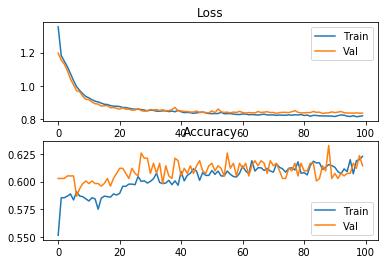

In [65]:
training = model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_val, Y_val))

# Modelisation graphique de la perte et de la precision pendant l'entrainement
plt.subplot(211)
plt.title('Loss')
plt.plot(training.history['loss'], label='train')
plt.plot(training.history['val_loss'], label='val')
plt.legend(['Train', 'Val'])
plt.subplot(212)
plt.title('Accuracy')
plt.plot(training.history['accuracy'], label='train')
plt.plot(training.history['val_accuracy'], label='val')
plt.legend(['Train', 'Val'])
plt.show()

In [66]:
model.evaluate(X_test, Y_test)[1]

438/438 [==============================] - 0s 73us/step


0.6232876777648926

On obtient donc finalement une précision de 62% sur les données de test. Malgré plusieurs essais avec plusieurs hyperparamètres différents, en choisissant d'inclure toutes les features ou seulement les features numériques, on tourne toujours autour de 60% de précision. Il y a probablement certaines optimisations à faire, mais que l'on a pas su trouver au cours du projet. 